# PRUEBAS Y ERRORES

In [101]:
#Instalamos la librería de Spotify para Pyhton llamdada "Spotipy"
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials

In [103]:
# load the .env file variables
load_dotenv()
#Obtener las credenciales (usuario y contraseña)
id_cliente = os.environ.get("CLIENT_ID")
codigo_cliente = os.environ.get("CLIENT_SECRET")
autenticacion = SpotifyClientCredentials(client_id = id_cliente, client_secret = codigo_cliente)
spotify = sp.Spotify(auth_manager = autenticacion)

In [104]:
#Conseguir el top 10 de canciones más escuchadas en Spotify de mi artista favorito.
nombre_artista = "Emilia"
#Se ve en spotify en los ultimos números del url (https://open.spotify.com/intl-es/artist/0AqlFI0tz2DsEoJlKSIiT9)
id_artista = "0AqlFI0tz2DsEoJlKSIiT9"
print(f"Top 10 canciones más escuchadas en Spotify de {nombre_artista}:")
top_tracks = spotify.artist_top_tracks(id_artista)
for i, track in enumerate(top_tracks["tracks"][:7]):
    nombre = track["name"]
    popularidad = track["popularity"]
    print(f"{i+1}.{nombre}{popularidad}")

Top 10 canciones más escuchadas en Spotify de Emilia:


1.blackout 🧊85
2.MOTINHA 2.0 (Mete Marcha) - Remix82
3.bunda 🍑80
4.Perdonarte, ¿Para Qué?78
5.MASNA REMIX77
6.La_Original.mp374
7.Los del Espacio75


In [105]:
#Convertir en dataframe el resultado obtenido
datos = [{"nombre": track["name"],"popularidad": track["popularity"]}
         for track in top_tracks["tracks"][:100]]
emilia_df = pd.DataFrame(datos)
print(emilia_df)

                              nombre  popularidad
0                         blackout 🧊           85
1  MOTINHA 2.0 (Mete Marcha) - Remix           82
2                            bunda 🍑           80
3             Perdonarte, ¿Para Qué?           78
4                        MASNA REMIX           77
5                    La_Original.mp3           74
6                    Los del Espacio           75
7      Una Foto Remix (feat. Emilia)           75
8                            Alegría           71
9           Olvidarte (feat. Emilia)           69


/tmp/ipykernel_474/2842495525.py:6: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_474/2842495525.py:6: UserWarning: Glyph 127825 (\N{PEACH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127825 (\N{PEACH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


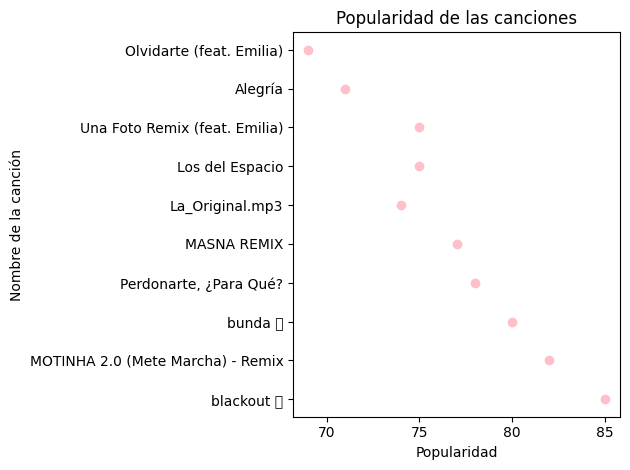

In [106]:
#Analizar relación estadística
plt.scatter(emilia_df["popularidad"], emilia_df["nombre"], color = "pink")
plt.title("Popularidad de las canciones")
plt.xlabel("Popularidad")
plt.ylabel("Nombre de la canción")
plt.tight_layout()
plt.show()

# CONCLUSION:

- Con una base de datos de sólo 2 variables, en la cual una es cualitativa y la otra cuantitativa, no se puede encontrar una correlación.

- Se aconseja crear un data frame con más o todas las variables disponibles.